# Average households' expenditures on energy, by income decile

# Import general modules

In [8]:


import pandas
import seaborn
from pandas import concat


# Import modules specific to OpenFisca

In [9]:
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_line
from openfisca_france_indirect_taxation.surveys import SurveyScenario
from openfisca_france_indirect_taxation.almost_ideal_demand_system.aids_estimation_from_stata import get_elasticities
from openfisca_france_indirect_taxation.calibration import get_inflators_by_year_energy

# Import new colors

In [10]:
seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline


# Simulate energy expenditures by income decile

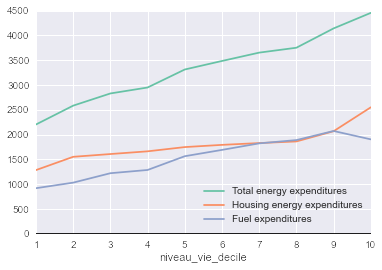

In [11]:
# Sélection des variables utilisées pour la simulation

inflators_by_year = get_inflators_by_year_energy(rebuild = False)
year = 2012
data_year = 2011
elasticities = get_elasticities(data_year)
inflation_kwargs = dict(inflator_by_variable = inflators_by_year[year])
del inflation_kwargs['inflator_by_variable']['somme_coicop12']

simulated_variables = ['depenses_energies', 'depenses_energies_logement', 'poste_coicop_722']

survey_scenario = SurveyScenario.create(
    elasticities = elasticities,
    inflation_kwargs = inflation_kwargs,
    reform_key = 'taxe_carbone',
    year = year,
    data_year = data_year
    )
pivot_table = pandas.DataFrame()
for values in simulated_variables:
    pivot_table = pandas.concat([
        pivot_table,
        survey_scenario.compute_pivot_table(values = [values], columns = ['niveau_vie_decile'])
        ])
df = pivot_table.T
df.rename(columns = {'depenses_energies': 'Total energy expenditures',
    'depenses_energies_logement': 'Housing energy expenditures',
    'poste_coicop_722': 'Fuel expenditures'},
    inplace = True)

# Réalisation de graphiques
graph_builder_line(df)

